In [10]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data_normalized = pd.read_csv("Output/Preprocessed_CC_GENERAL.csv")


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_normalized)

In [13]:
kmeans_silhouette = silhouette_score(data_normalized, kmeans_labels)


In [14]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_normalized)

In [15]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(
        data_normalized[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]
    )
else:
    dbscan_silhouette = -1

In [16]:
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

K-means Silhouette Score: 0.2068
DBSCAN Silhouette Score: 0.0732


In [17]:
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering')

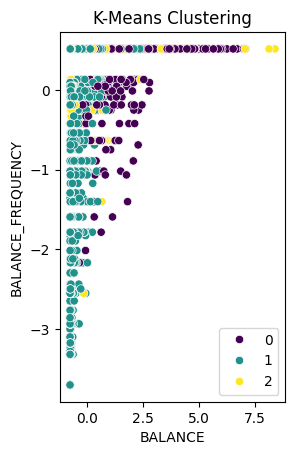

In [18]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_normalized.iloc[:, 0], y=data_normalized.iloc[:, 1], hue=kmeans_labels, palette="viridis", legend='full')
plt.title("K-Means Clustering")

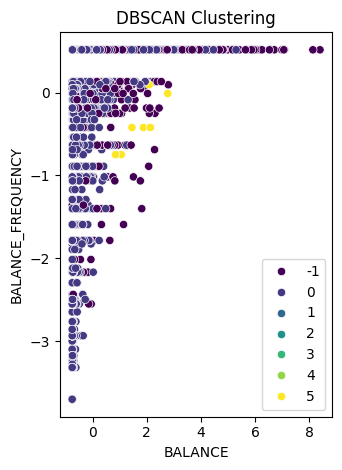

In [19]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_normalized.iloc[:, 0], y=data_normalized.iloc[:, 1], hue=dbscan_labels, palette="viridis", legend='full')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

In [20]:
if kmeans_silhouette > dbscan_silhouette:
    print("K-means is recommended as it has a higher silhouette score.")
else:
    print("DBSCAN is recommended as it has a higher silhouette score or better noise handling.")

K-means is recommended as it has a higher silhouette score.
